## 作業
### 請使用 application_train.csv, 根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將列出相異的 HOUSETYPE_MODE 類別 (In[3])
- 如何依照不同的 HOUSETYPE_MODE 類別指定資料, 並繪製長條圖(.hist())? (In[3])

In [150]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

# 忽略警告訊息
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

In [151]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
pd.unique(app_train['HOUSETYPE_MODE'])
# app_train['AMT_CREDIT']

array(['block of flats', nan, 'terraced house', 'specific housing'],
      dtype=object)

In [153]:
app_train['HOUSETYPE_MODE']

0         block of flats
1         block of flats
2                    NaN
3                    NaN
4                    NaN
               ...      
307506    block of flats
307507    block of flats
307508    block of flats
307509    block of flats
307510    block of flats
Name: HOUSETYPE_MODE, Length: 307511, dtype: object

In [154]:
# 使用不同的 HOUSETYPE_MODE 類別繪製圖形, 並使用 subplot 排版
"""
Your Code Here
"""
unique_house_type = pd.unique(app_train['HOUSETYPE_MODE'])
app_train["HOUSETYPE_MODE"]=app_train["HOUSETYPE_MODE"].astype(str)

# group.get_group(float('nan'))
# group=[group.get_group(i) for i in unique_house_type]


house_type=app_train[['HOUSETYPE_MODE','AMT_CREDIT']]
group=house_type.groupby("HOUSETYPE_MODE")
group.groups

{'block of flats': Int64Index([     0,      1,     12,     13,     14,     18,     20,     22,
                 23,     24,
             ...
             307495, 307498, 307500, 307501, 307505, 307506, 307507, 307508,
             307509, 307510],
            dtype='int64', length=150503),
 'nan': Int64Index([     2,      3,      4,      5,      6,      7,      8,      9,
                 10,     11,
             ...
             307491, 307492, 307493, 307494, 307496, 307497, 307499, 307502,
             307503, 307504],
            dtype='int64', length=154297),
 'specific housing': Int64Index([   349,    435,    453,    814,   1425,   1440,   2021,   2094,
               2216,   2404,
             ...
             305592, 305667, 305892, 306328, 306517, 306639, 306917, 306934,
             307141, 307242],
            dtype='int64', length=1499),
 'terraced house': Int64Index([   207,    606,    995,   1155,   1163,   1270,   1896,   2045,
               2049,   2058,
             .

In [155]:
house_type['AMT_CREDIT'].min()
house_type

,HOUSETYPE_MODE,AMT_CREDIT
0,block of flats,406597.5
1,block of flats,1293502.5
2,nan,135000.0
3,nan,312682.5
4,nan,513000.0
...,...,...
307506,block of flats,254700.0
307507,block of flats,269550.0
307508,block of flats,677664.0
307509,block of flats,370107.0


In [156]:
credit=pd.cut(house_type['AMT_CREDIT'],bins=np.linspace(house_type['AMT_CREDIT'].min(),
                                                        house_type['AMT_CREDIT'].max(),num=8))
house_type['AMT_CREDIT_range']=credit
# group=house_type.groupby('HOUSETYPE_MODE')
credit_range=house_type['AMT_CREDIT_range'].unique()
credit_range=credit_range[~credit_range.isnull()]

In [157]:
house_type=house_type.dropna(axis='rows')
house_type

,HOUSETYPE_MODE,AMT_CREDIT,AMT_CREDIT_range
0,block of flats,406597.5,"(45000.0, 617142.857]"
1,block of flats,1293502.5,"(1189285.714, 1761428.571]"
2,nan,135000.0,"(45000.0, 617142.857]"
3,nan,312682.5,"(45000.0, 617142.857]"
4,nan,513000.0,"(45000.0, 617142.857]"
...,...,...,...
307506,block of flats,254700.0,"(45000.0, 617142.857]"
307507,block of flats,269550.0,"(45000.0, 617142.857]"
307508,block of flats,677664.0,"(617142.857, 1189285.714]"
307509,block of flats,370107.0,"(45000.0, 617142.857]"


In [158]:
group=house_type.groupby('AMT_CREDIT_range')
group.groups

{Interval(45000.0, 617142.857, closed='right'): Int64Index([     0,      2,      3,      4,      5,      9,     11,     12,
                 15,     16,
             ...
             307497, 307499, 307501, 307502, 307503, 307504, 307505, 307506,
             307507, 307509],
            dtype='int64', length=185780),
 Interval(617142.857, 1189285.714, closed='right'): Int64Index([     8,     10,     13,     14,     21,     26,     28,     30,
                 33,     34,
             ...
             307469, 307472, 307477, 307478, 307487, 307491, 307493, 307495,
             307508, 307510],
            dtype='int64', length=93152),
 Interval(1189285.714, 1761428.571, closed='right'): Int64Index([     1,      6,      7,     40,     48,     49,     59,     60,
                 65,     75,
             ...
             307428, 307438, 307443, 307452, 307454, 307475, 307480, 307492,
             307498, 307500],
            dtype='int64', length=23338),
 Interval(1761428.571, 2333571.42

In [160]:
credit_range

[(45000.0, 617142.857], (1189285.714, 1761428.571], (617142.857, 1189285.714], (1761428.571, 2333571.429], (2333571.429, 2905714.286], (2905714.286, 3477857.143], (3477857.143, 4050000.0]]
Categories (7, interval[float64]): [(45000.0, 617142.857] < (617142.857, 1189285.714] < (1189285.714, 1761428.571] < (1761428.571, 2333571.429] < (2333571.429, 2905714.286] < (2905714.286, 3477857.143] < (3477857.143, 4050000.0]]

In [163]:
house_credit=[group.get_group(i) for i in credit_range]
house_credit
# flat=group.get_group('block of flats')
# nan=group.get_group('nan')
# specific=group.get_group('specific housing')
# terraced=group.get_group('terraced house')
# flat

[        HOUSETYPE_MODE  AMT_CREDIT       AMT_CREDIT_range
 0       block of flats    406597.5  (45000.0, 617142.857]
 2                  nan    135000.0  (45000.0, 617142.857]
 3                  nan    312682.5  (45000.0, 617142.857]
 4                  nan    513000.0  (45000.0, 617142.857]
 5                  nan    490495.5  (45000.0, 617142.857]
 ...                ...         ...                    ...
 307504             nan    331920.0  (45000.0, 617142.857]
 307505  block of flats    225000.0  (45000.0, 617142.857]
 307506  block of flats    254700.0  (45000.0, 617142.857]
 307507  block of flats    269550.0  (45000.0, 617142.857]
 307509  block of flats    370107.0  (45000.0, 617142.857]
 
 [185780 rows x 3 columns],
         HOUSETYPE_MODE  AMT_CREDIT            AMT_CREDIT_range
 1       block of flats   1293502.5  (1189285.714, 1761428.571]
 6                  nan   1560726.0  (1189285.714, 1761428.571]
 7                  nan   1530000.0  (1189285.714, 1761428.571]
 40   

In [176]:
house_type['HOUSETYPE_MODE'].unique()
house_credit[1]['AMT_CREDIT_range'].mode().values[0]

Interval(1189285.714, 1761428.571, closed='right')

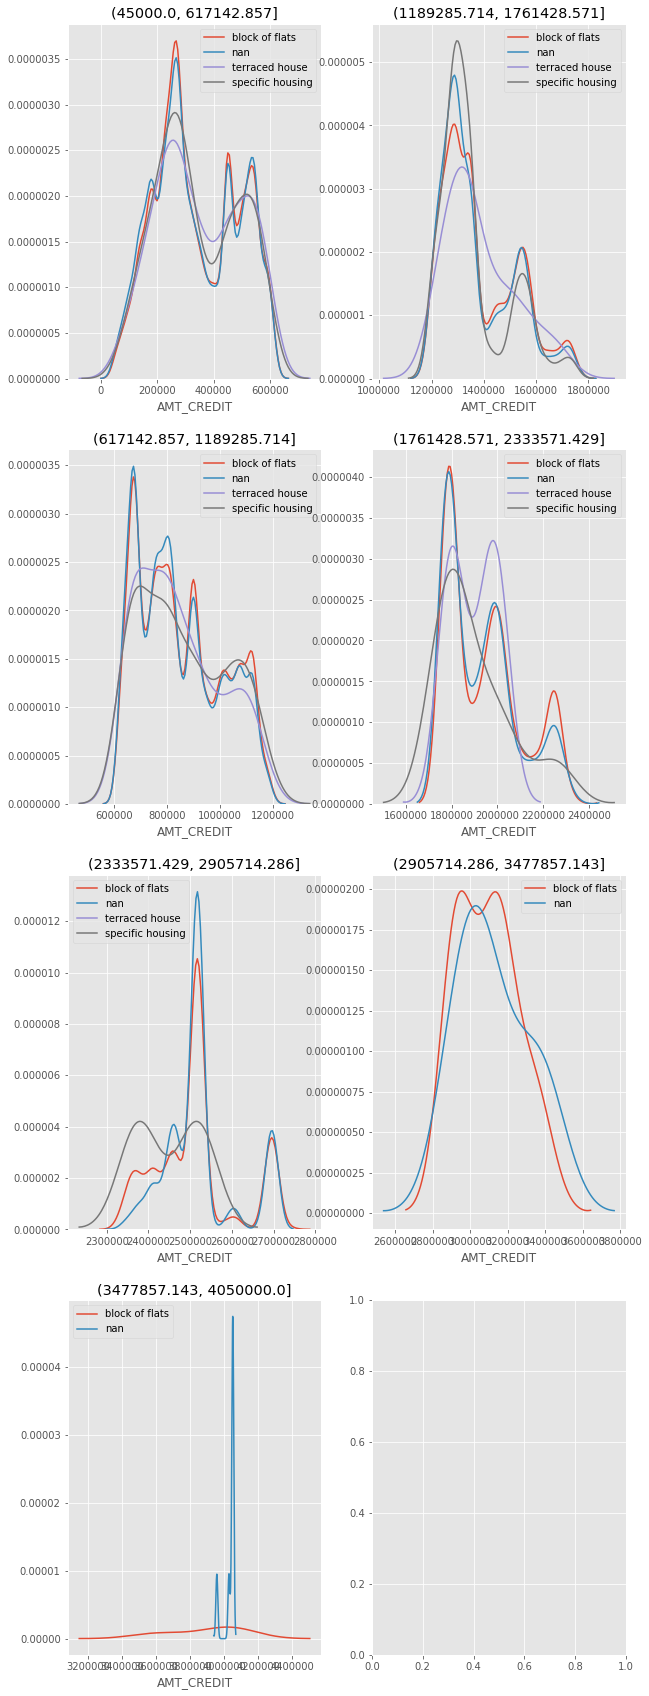

In [179]:
nrows = len(unique_house_type)
ncols = nrows//2 

plt.figure(figsize=(10,30))
for i in range(nrows*ncols):
    
    plt.subplot(nrows, ncols, i+1)
    """
    Your Code Here
    """
    if i==nrows*ncols-1:
        break
    sns.distplot(house_credit[i].loc[house_credit[i]['HOUSETYPE_MODE']=='block of flats','AMT_CREDIT'],
                 label='block of flats',hist=False)
    sns.distplot(house_credit[i].loc[house_credit[i]['HOUSETYPE_MODE']=='nan','AMT_CREDIT'],
                 label='nan',hist=False)
    sns.distplot(house_credit[i].loc[house_credit[i]['HOUSETYPE_MODE']=='terraced house','AMT_CREDIT'],
                 label='terraced house',hist=False)
    sns.distplot(house_credit[i].loc[house_credit[i]['HOUSETYPE_MODE']=='specific housing','AMT_CREDIT'],
                 label='specific housing',hist=False)
#     app_train.loc[ , ].hist()
    
    plt.title(str(house_credit[i]['AMT_CREDIT_range'].mode().values[0]))
plt.show()    